## Exercise 2

In [2]:
using CSV, DataFrames, Statistics, GLM, StatsPlots, StatsModels, StatsBase

In [3]:
file_path = "/Users/michelletorres/Desktop/Homeworks AI/archive/bottle.csv"
data = CSV.read(file_path, DataFrame)

Row,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,RecInd,T_prec,T_qual,S_prec,S_qual,P_qual,O_qual,SThtaq,O2Satq,ChlorA,Chlqua,Phaeop,Phaqua,PO4uM,PO4q,SiO3uM,SiO3qu,NO2uM,NO2q,NO3uM,NO3q,NH3uM,NH3q,C14As1,C14A1p,C14A1q,C14As2,C14A2p,C14A2q,DarkAs,DarkAp,DarkAq,MeanAs,MeanAp,MeanAq,IncTim,LightP,R_Depth,R_TEMP,R_POTEMP,R_SALINITY,R_SIGMA,R_SVA,R_DYNHT,R_O2,R_O2Sat,R_SIO3,R_PO4,R_NO3,R_NO2,R_NH4,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
,Int64,Int64,String15,String,Int64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64?,Int64,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,Float64?,Int64?,Int64?,String31?,Float64?,Float64,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,Int64,Int64?,Float64?,Float64?,Float64?,Float64?,Float64?,Float64?,String?
1,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.5,33.44,missing,25.649,missing,missing,missing,3,1,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,0.0,10.5,10.5,33.44,25.64,233.0,0.0,missing,missing,missing,missing,missing,missing,missing,missing,missing,0,missing,missing,missing,missing,missing,missing,missing,missing
2,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.44,missing,25.656,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,8.0,10.46,10.46,33.44,25.65,232.5,0.01,missing,missing,missing,missing,missing,missing,missing,missing,missing,8,missing,missing,missing,missing,missing,missing,missing,missing
3,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,missing,25.654,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,10.0,10.46,10.46,33.437,25.65,232.8,0.02,missing,missing,missing,missing,missing,missing,missing,missing,missing,10,missing,missing,missing,missing,missing,missing,missing,missing
4,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.42,missing,25.643,missing,missing,missing,3,2,missing,2,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,19.0,10.45,10.45,33.42,25.64,234.1,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,19,missing,missing,missing,missing,missing,missing,missing,missing
5,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,missing,25.643,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,20.0,10.45,10.45,33.421,25.64,234.0,0.04,missing,missing,missing,missing,missing,missing,missing,missing,missing,20,missing,missing,missing,missing,missing,missing,missing,missing
6,1,6,054.0 056.0,19-4903CR-HY-060-0930-05400560-0030A-7,30,10.45,33.431,missing,25.651,missing,missing,missing,7,2,missing,3,missing,9,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,9,missing,missing,30.0,10.45,10.45,33.431,25.65,233.5,0.07,missing,missing,missing,missing,missing,missing,missing,missing,missing,30,missing,missing,missing,missing,missing,missin

In [9]:
names(data) .= strip.(names(data)) # Remove extra spaces from column names
println("Columnas disponibles:") 
for col in names(data)
    println("`$col`")
end

Columnas disponibles:
`Cst_Cnt`
`Btl_Cnt`
`Sta_ID`
`Depth_ID`
`Depthm`
`T_degC`
`Salnty`
`O2ml_L`
`STheta`
`O2Sat`
`Oxy_µmol/Kg`
`BtlNum`
`RecInd`
`T_prec`
`T_qual`
`S_prec`
`S_qual`
`P_qual`
`O_qual`
`SThtaq`
`O2Satq`
`ChlorA`
`Chlqua`
`Phaeop`
`Phaqua`
`PO4uM`
`PO4q`
`SiO3uM`
`SiO3qu`
`NO2uM`
`NO2q`
`NO3uM`
`NO3q`
`NH3uM`
`NH3q`
`C14As1`
`C14A1p`
`C14A1q`
`C14As2`
`C14A2p`
`C14A2q`
`DarkAs`
`DarkAp`
`DarkAq`
`MeanAs`
`MeanAp`
`MeanAq`
`IncTim`
`LightP`
`R_Depth`
`R_TEMP`
`R_POTEMP`
`R_SALINITY`
`R_SIGMA`
`R_SVA`
`R_DYNHT`
`R_O2`
`R_O2Sat`
`R_SIO3`
`R_PO4`
`R_NO3`
`R_NO2`
`R_NH4`
`R_CHLA`
`R_PHAEO`
`R_PRES`
`R_SAMP`
`DIC1`
`DIC2`
`TA1`
`TA2`
`pH2`
`pH1`
`DIC Quality Comment`


In [10]:
columns_of_interest = [:T_degC, :Salnty, :Depthm, :O2ml_L] # Necessary columns as symbols
missing_columns = setdiff(columns_of_interest, Symbol.(names(data))) # Check if required columns are present (convert DataFrame columns to symbols)
if !isempty(missing_columns)
    println("Faltan las siguientes columnas en DataFrame: $missing_columns")
    error("Faltan columnas necesarias")
end

In [25]:
filtered_data = data[:, columns_of_interest] # Filter columns
filtered_data = dropmissing(filtered_data) # Ensure there are no missing values in the selected columns
println("Datos después de filtrado:") # Verify that the columns have been loaded correctly

Datos después de filtrado:


In [12]:
data_model = @formula(T_degC ~ Salnty + Depthm + O2ml_L) # Linear regression with GLM
lm_model = lm(data_model, filtered_data)
println("Resumen del modelo:")
println(coef(lm_model))
println(summary(lm_model))


Resumen del modelo:
[-168.2751028141903, 5.115126418319546, -0.005011889278487319, 2.1179814380587105]
StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}


In [13]:
function calculate_rmse(model, data)
    predictions = StatsBase.predict(model, data)  # Utiliza StatsBase.predict
    residuals = data[:, :T_degC] .- predictions
    return sqrt(mean(residuals .^ 2))
end

calculate_rmse (generic function with 1 method)

In [14]:
rmse = calculate_rmse(lm_model, filtered_data)
println("RMSE del modelo: $rmse")

RMSE del modelo: 1.9436411276934393


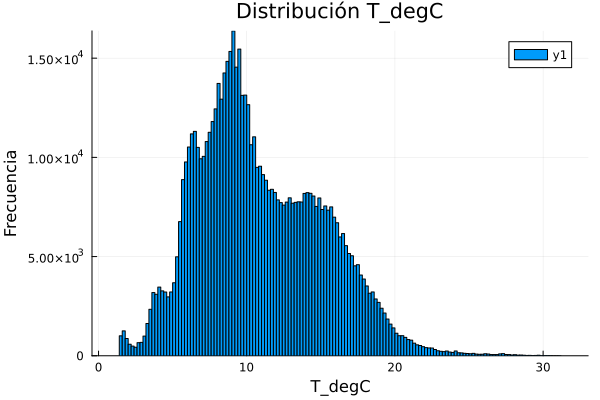

In [16]:
histogram(filtered_data[!, :T_degC], title="Distribución T_degC", xlabel="T_degC", ylabel="Frecuencia")

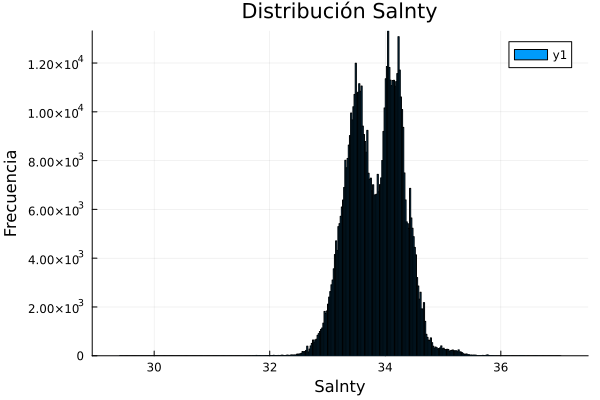

In [17]:
histogram(filtered_data[!, :Salnty], title="Distribución Salnty", xlabel="Salnty", ylabel="Frecuencia")

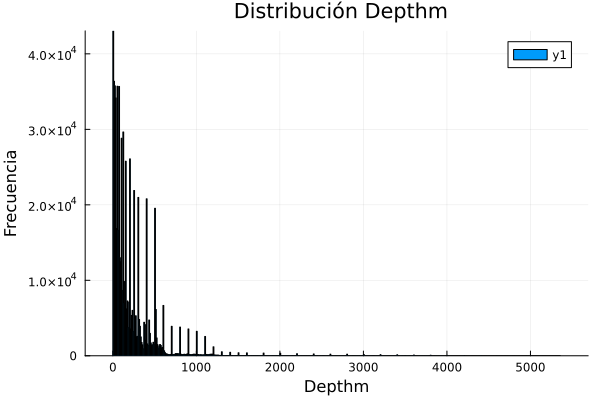

In [18]:
histogram(filtered_data[!, :Depthm], title=" Distribución Depthm", xlabel="Depthm", ylabel="Frecuencia")

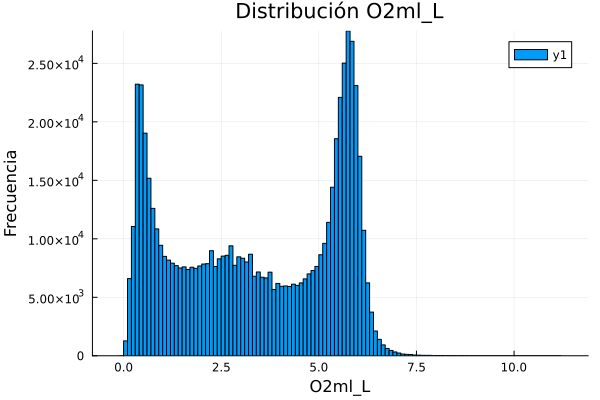

In [19]:
histogram(filtered_data[!, :O2ml_L], title="Distribución O2ml_L", xlabel="O2ml_L", ylabel="Frecuencia")

In [22]:
combinations = [ # List of independent variable combinations
    [:Salnty, :Depthm, :O2ml_L],
    [:Salnty, :Depthm],
    [:Salnty, :O2ml_L],
    [:Depthm, :O2ml_L],
    [:Salnty],
    [:Depthm],
    [:O2ml_L]
]

best_rmse = Inf
best_model = nothing
best_combination = nothing
##################################
names(filtered_data)
println(names(filtered_data))  # Verify column names
#################################
for combination in combinations
    formula = @eval @formula(T_degC ~ $(Expr(:call, :+, combination...)))     # @eval to correctly construct the formula
    lm_model = lm(formula, filtered_data)
    rmse = calculate_rmse(lm_model, filtered_data)    # Calculate RMSE for the current combination
    println("RMSE para combinación $combination: $rmse")
    if rmse < best_rmse     # If RMSE is better, save the model
        best_rmse = rmse
        best_model = lm_model
        best_combination = combination
    end
end

["T_degC", "Salnty", "Depthm", "O2ml_L"]
RMSE para combinación [:Salnty, :Depthm, :O2ml_L]: 1.9436411276934393
RMSE para combinación [:Salnty, :Depthm]: 3.0811490028449944
RMSE para combinación [:Salnty, :O2ml_L]: 2.3063058428905685
RMSE para combinación [:Depthm, :O2ml_L]: 2.345609992014096
RMSE para combinación [:Salnty]: 3.64457684656509
RMSE para combinación [:Depthm]: 3.152476963183015
RMSE para combinación [:O2ml_L]: 2.5625749572805048


Mejor variable para combianción: [:Salnty, :Depthm, :O2ml_L] with RMSE: 1.9436411276934393


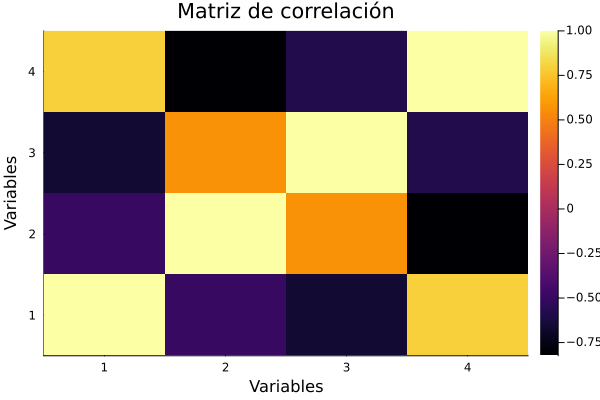

In [24]:
println("Mejor variable para combianción: $best_combination with RMSE: $best_rmse")
correlation_matrix = cor(Matrix(filtered_data[:, [:T_degC, :Salnty, :Depthm, :O2ml_L]])) # Correlation between variables
heatmap(correlation_matrix, xlabel="Variables", ylabel="Variables", title="Matriz de correlación")
